In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline 
import string # special operations on strings
import spacy # languate models

In [ ]:
# load the dataset
elon_musk = pd.read_csv("/content/Elon_musk.csv",encoding="Latin1",error_bad_lines=False)
elon_musk

<ipython-input-47-c5a8b7485713>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  elon_musk = pd.read_csv("/content/Elon_musk.csv",encoding="Latin1",error_bad_lines=False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## EDA Process

In [ ]:
elon_musk.drop(['Unnamed: 0'],inplace = True,axis = 1)
elon_musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
elon_musk = [Text.strip() for Text in elon_musk.Text] # remove both the loading and the trailing characters 
elon_musk = [Text for Text in elon_musk if Text] # removes empty string because they are considered as false in python 

In [ ]:
# joining the list into one string /text
cleaned_tweets = " ".join(elon_musk)
len(cleaned_tweets)

158702

In [ ]:
# punctuation
no_punc_text = cleaned_tweets.translate(str.maketrans('','',string.punctuation)) # with arguements (x,y,z) where 'x' and 'y'
#must be equal-length strings and characters in 'x' are replaced by characters in 'y', 'z'
#is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [ ]:
import re
cleaned_tweets1 = re.sub(r'http\s+','',no_punc_text)
cleaned_tweets1[0:1000]

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [ ]:
# Tokanization 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(cleaned_tweets1)
print(text_tokens[0:100])


['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(text_tokens)

21077

In [ ]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])


['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed']


In [ ]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f

In [ ]:
!python -m spacy download en_core_web_sm

2023-04-19 19:16:39.283047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:100])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'just', 'send', 'just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'get', 'real', 'buy', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'u

# Feature extraction
- Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2439, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1677, 'nextlevel': 3157, 'have': 1671, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1609, 'interview': 2550, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1658, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1723, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1643, 'thanks': 4381, 'indeed': 2488, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [ ]:
print(vectorizer.get_feature_names_out()[50:100])
print(x.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(x.toarray().shape)

(15794, 4971)


## CountVectorizer with N-grams

In [ ]:
vectorizer_ngram_range  = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(elon_musk)

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(elon_musk)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

## WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

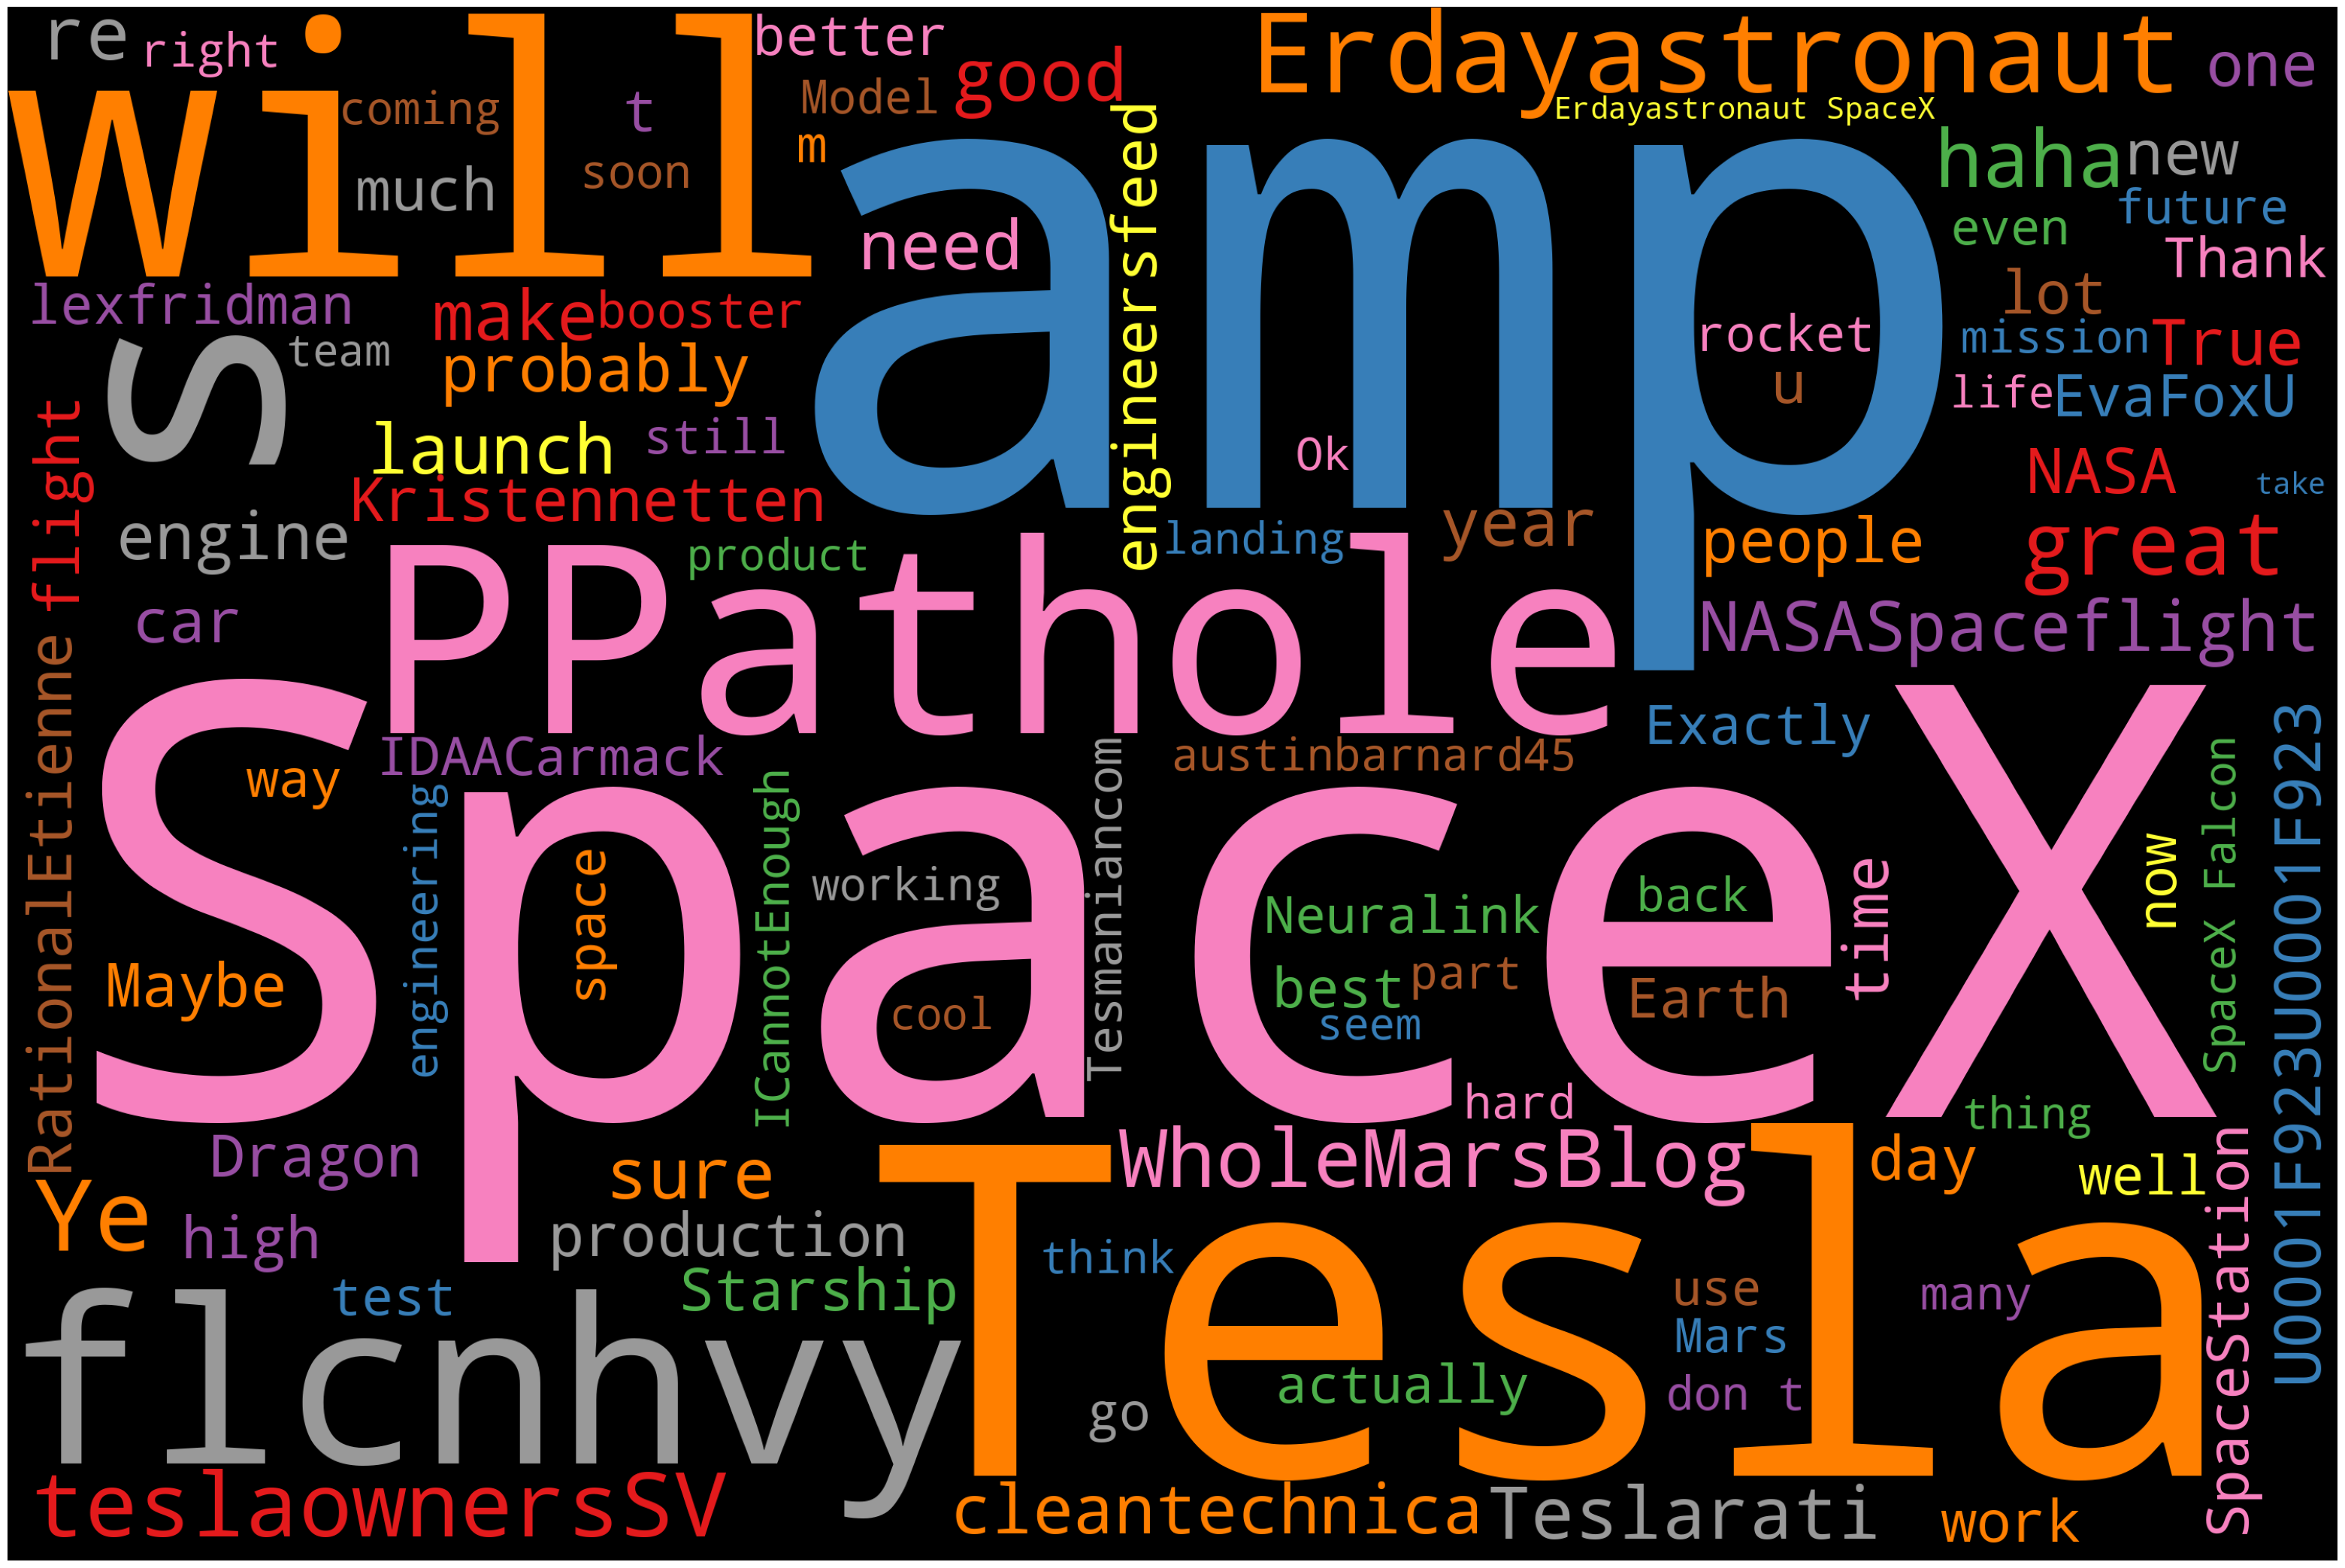

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set1',stopwords=stopwords).generate(cleaned_tweets1)
# Plot
plot_cloud(wordcloud)


In [ ]:
nlp=spacy.load('en_core_web_sm')
one_block=cleaned_tweets1
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

kanyewest PROPN
httpstco3rWE9uHSTS PROPN
geoffkeighley PROPN
UnrealEngine PROPN
Its PROPN
getting VERB
real ADJ
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil NOUN
X PROPN
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
JoshManMode PROPN
He PRON
definitely ADV
has VERB
issues NOUN
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
freewalletorg NOUN
Thanks NOUN
for ADP
fixing VERB
freewalletorg NOUN
Please INTJ
unlock VERB
my PRON
account NOUN
AstroJordy PROPN
U0001F923U0001F923 PROPN
This PRON
is AUX
true ADJ
power NOUN
haha NOUN
httpstcoFc9uhQSd7O PROPN
freewalletorg NOUN
Any DET
crypto ADJ
wallet NOUN
that SCONJ
wont NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN
freewalletorg VERB
Your PRON
app NOUN
sucks VERB
RT PROPN
SpaceX PROPN
NASA PROPN
has AUX
selected VERB
Falcon PROPN
Heavy PROPN
to PART
launch VERB
the DET
first ADJ
two NUM
elements NOUN
of ADP
the DET
lunar ADJ
Gateway N

In [ ]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['bit', 'itsALLrisky', 'appears', 'fixed', 'coins', 'unit', 'time', 'kevinmgill', 'michaelhodapp', 'launch', 'tower', 'stack', 'Raptors', 'orbit', 'booster', 'ship', 'amp', 'booster', 'mass', 'michaelhodapp', 'work', 'tonight', 'video', 'httpstcoUEEocOfcTb', 'people', 'spoken', 'lexfridman', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'pain', 'let', 'rainforests', 'come', 'itsALLrisky', 'genesimmons', 'simplicity', 'genius', 'astrogdogg', 'wapodavenport', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'learned', 'tell', 'story', 'amp', 'read', 'heard', 'name', 'years', 'httpstcocnOf9yjpF1', 'That\x92s', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'redlineshifter', 'scratch', 'wonderofscience', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'greate', 'httpstcoe5Wikiugkz', 'use', 'gas', 'maneuvering', 'thrusters', 'seem', 'have', 'launch', 'mission', 'collect', 'data', 'galaxies', 'explore', 'launches', 'satellites', 'or

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,amp,96
1,have,49
2,flcnhvy,45
3,launch,42
4,make,33
5,people,31
6,need,31
7,engineersfeed,29
8,year,28
9,do,27


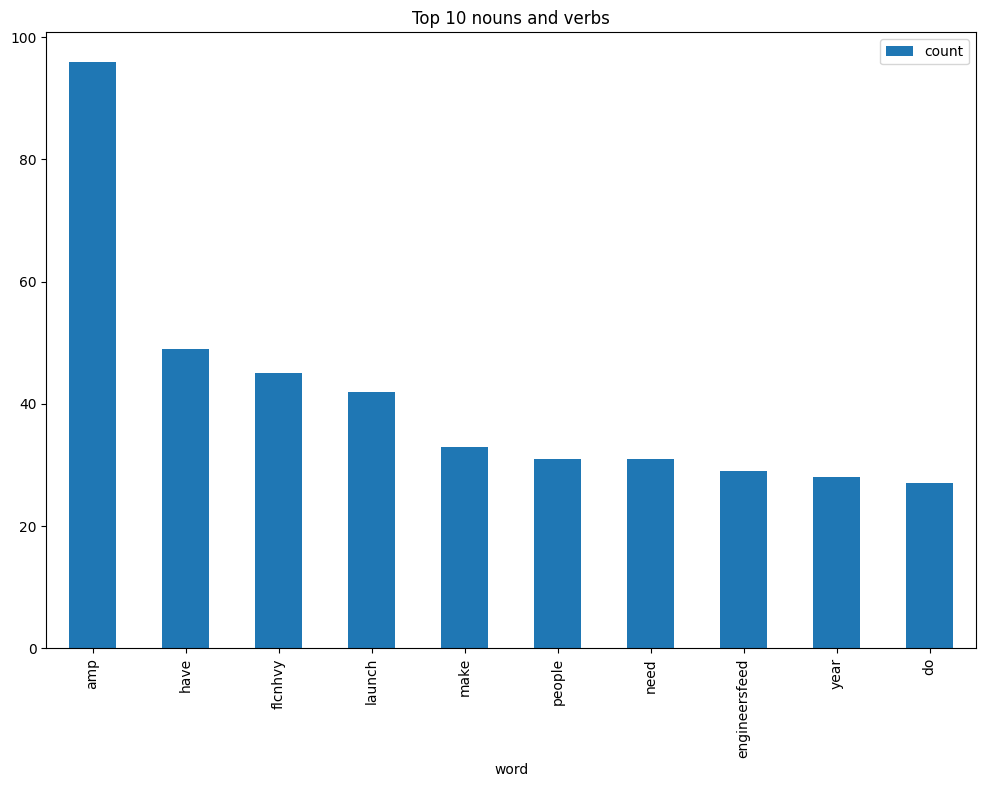

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elon_musk))
sentences[0:100]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64